Pràctica: Project 2B  
Autores: Bo Miquel Nordfeldt, Joan Muntaner, Helena Antich  
Fecha: Abril 2021 
# Descripción de la práctica  
Breve descripción de la práctica:

# Librerías 

In [11]:
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import random

# Código inicial  
Descripción del código inicial dado por el curso


Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Epoch 1/25
250/250 [==============================] - 25s 100ms/step - loss: 0.6649 - accuracy: 0.5947 - val_loss: 0.6381 - val_accuracy: 0.6069
Epoch 2/25
250/250 [==============================] - 23s 93ms/step - loss: 0.5887 - accuracy: 0.6821 - val_loss: 0.5935 - val_accuracy: 0.7017
Epoch 3/25
250/250 [==============================] - 23s 93ms/step - loss: 0.5439 - accuracy: 0.7264 - val_loss: 0.4539 - val_accuracy: 0.7353
Epoch 4/25
250/250 [==============================] - 23s 92ms/step - loss: 0.5127 - accuracy: 0.7464 - val_loss: 0.4151 - val_accuracy: 0.7541
Epoch 5/25
250/250 [==============================] - 23s 92ms/step - loss: 0.4957 - accuracy: 0.7626 - val_loss: 0.4252 - val_accuracy: 0.7607
Epoch 6/25
250/250 [==============================] - 23s 91ms/step - loss: 0.4712 - accuracy: 0.7761 - val_loss: 0.6554 - val_accuracy: 0.7663
Epoch 7/25
250/250 [==============================]

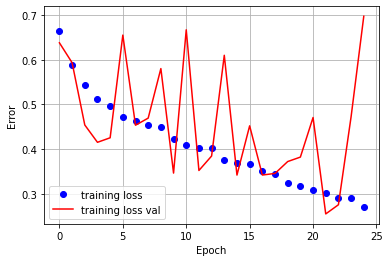

FileNotFoundError: [Errno 2] No such file or directory: 'dataset/single_prediction/cat_or_dog_1.jpg'

In [13]:
tf.random.set_seed(42)
np.random.seed(42)
random.seed(42)

# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Part 2 - Fitting the CNN to the images



train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(r'C:\Users\munta\OneDrive\Escritorio\Aprendizaje Profundo\G03_Project2B\G03_Project2B\deeplearning-az-master\datasets\Part 2 - Convolutional Neural Networks (CNN)\dataset\training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory(r'C:\Users\munta\OneDrive\Escritorio\Aprendizaje Profundo\G03_Project2B\G03_Project2B\deeplearning-az-master\datasets\Part 2 - Convolutional Neural Networks (CNN)\dataset\test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

history = classifier.fit_generator(training_set,
                                   steps_per_epoch = 250,
                                   epochs = 25,
                                   validation_data = test_set,
                                   validation_steps = 62)

history_dict=history.history
loss_values = history_dict['loss']
val_loss_values=history_dict['val_loss']
plt.plot(loss_values,'bo',label='training loss') 
plt.plot(val_loss_values,'r',label='training loss val')
plt.legend()
plt.grid()
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.show()



# Part 3 - Making new predictions
test_image = image.load_img('dataset/single_prediction/cat_or_dog_1.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'

Deficiencias del código

# Pruebas realizadas  
Se han realizado diversas pruebas, se pueden encontrar algunas en la carpeta adjunta de "pruebas". Dos de las más destacadas son: 

## Prueba ejemplo 1  
Descripción de la prueba

In [ ]:
# Importar las librerías y paquetes

tf.random.set_seed(42)
np.random.seed(42)
random.seed(42)

# Parte 1 - Construir el modelo de CNN

# Inicializar la CNN
classifier = Sequential()

# Paso 1 - Convolución
classifier.add(Conv2D(filters = 32,kernel_size = (3, 3), 
                      input_shape = (64, 64, 3), activation = "relu"))

# Paso 2 - Max Pooling
classifier.add(MaxPooling2D(pool_size = (2,2)))

# Una segunda capa de convolución y max pooling
classifier.add(Conv2D(filters = 32,kernel_size = (3, 3), activation = "relu"))

classifier.add(MaxPooling2D(pool_size = (2,2)))


#este dropout desactiva el 25% de las conexiones entre las neuronas, lo cual mejora los resultados
classifier.add(Dropout(0.25)) # NUEVO 

# Paso 3 - Flattening
classifier.add(Flatten())

# Paso 4 - Full Connection

classifier.add(Dense(units = 128, activation = "relu"))
#classifier.add(Dense(units = 64, activation = "relu")) #NUEVO
classifier.add(Dense(units = 32, activation = "relu")) #NUEVO
#este dropout desactiva el 25% de las conexiones entre las neuronas, lo cual mejora los resultados
classifier.add(Dropout(0.25)) # NUEVO 
classifier.add(Dense(units = 1, activation = "sigmoid"))

# Compilar la CNN
classifier.compile(optimizer = "RMSprop", loss = "binary_crossentropy", metrics = ["accuracy"]) #NUEVO
#classifier.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

# Parte 2 - Ajustar la CNN a las imágenes para entrenar 

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_dataset = train_datagen.flow_from_directory('dataset/training_set',
                                                    target_size=(64, 64),
                                                    batch_size=32,
                                                    class_mode='binary')

testing_dataset = test_datagen.flow_from_directory('dataset/test_set',
                                                target_size=(64, 64),
                                                batch_size=32,
                                                class_mode='binary')

#NUEVO #NUEVO #NUEVO #NUEVO #NUEVO #NUEVO #NUEVO #NUEVO #NUEVO #NUEVO
# A los 15 valores de coste sin variar significativamente deja de ajustar el modelo
earlystopper = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=100, verbose=1, mode='auto')

# Ajusta el modelo a más de 1000 iteraciones con el 'earlystopper' y lo asigna al historial
history = classifier.fit_generator(training_dataset,
                        steps_per_epoch=350,
                        epochs=20,
                        validation_data=testing_dataset,
                        validation_steps=200,
                        callbacks = [earlystopper])

# Plots 'history'
history_dict=history.history
loss_values = history_dict['loss']
val_loss_values=history_dict['val_loss']
plt.plot(loss_values,'bo',label='training loss') 
plt.plot(val_loss_values,'r',label='training loss val')
plt.legend()
plt.grid()
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.show()


# Parte 3 - Cómo hacer nuevas predicciones
test_image = image.load_img('dataset/single_prediction/cat_or_dog_1.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
training_dataset.class_indices
if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'

## Prueba ejemplo 2  
Descripción de la prueba

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
random.seed(42)


# Parte 1 - Construir el modelo de CNN

# Inicializar la CNN
classifier = Sequential()

# Paso 1 - Convolución
classifier.add(Conv2D(filters = 32,kernel_size = (3, 3), 
                      input_shape = (64, 64, 3), activation = "relu"))

# Paso 2 - Max Pooling
classifier.add(MaxPooling2D(pool_size = (2,2)))

# Una segunda capa de convolución y max pooling
classifier.add(Conv2D(filters = 32,kernel_size = (3, 3), activation = "relu"))

classifier.add(MaxPooling2D(pool_size = (2,2)))


#este dropout desactiva el 25% de las conexiones entre las neuronas, lo cual mejora los resultados
classifier.add(Dropout(0.25 )) # NUEVO 

# Paso 3 - Flattening
#classifier.add(Flatten())

#################################################################

classifier.add(Conv2D(filters = 32,kernel_size = (3, 3), 
                      input_shape = (64, 64, 3), activation = "relu"))

# Paso 2 - Max Pooling
classifier.add(MaxPooling2D(pool_size = (2,2)))

# Una segunda capa de convolución y max pooling
classifier.add(Conv2D(filters = 32,kernel_size = (3, 3), activation = "relu"))

classifier.add(MaxPooling2D(pool_size = (2,2)))


#este dropout desactiva el 25% de las conexiones entre las neuronas, lo cual mejora los resultados
classifier.add(Dropout(0.25 )) # NUEVO 

# Paso 3 - Flattening
classifier.add(Flatten())
################################################################################

# Paso 4 - Full Connection

classifier.add(Dense(units = 128, activation = "relu"))
#classifier.add(Dense(units = 64, activation = "relu")) #NUEVO
classifier.add(Dense(units = 32, activation = "relu")) #NUEVO
#este dropout desactiva el 25% de las conexiones entre las neuronas, lo cual mejora los resultados
classifier.add(Dropout(0.25)) # NUEVO 
classifier.add(Dense(units = 1, activation = "sigmoid"))

# Compilar la CNN
classifier.compile(optimizer = "RMSprop", loss = "binary_crossentropy", metrics = ["accuracy"]) #NUEVO
#classifier.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])
# Parte 2 - Ajustar la CNN a las imágenes para entrenar 

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_dataset = train_datagen.flow_from_directory('dataset/training_set',
                                                    target_size=(64, 64),
                                                    batch_size=32,
                                                    class_mode='binary')

testing_dataset = test_datagen.flow_from_directory('dataset/test_set',
                                                target_size=(64, 64),
                                                batch_size=32,
                                                class_mode='binary')

#NUEVO #NUEVO #NUEVO #NUEVO #NUEVO #NUEVO #NUEVO #NUEVO #NUEVO #NUEVO
# A los 15 valores de coste sin variar significativamente deja de ajustar el modelo
earlystopper = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=100, verbose=1, mode='auto')

# Ajusta el modelo a más de 1000 iteraciones con el 'earlystopper' y lo asigna al historial
history = classifier.fit_generator(training_dataset,
                        steps_per_epoch=350,
                        epochs=60,
                        validation_data=testing_dataset,
                        validation_steps=200,
                        callbacks = [earlystopper])

# Plots 'history'
history_dict=history.history
loss_values = history_dict['loss']
val_loss_values=history_dict['val_loss']
plt.plot(loss_values,'bo',label='training loss') 
plt.plot(val_loss_values,'r',label='training loss val')
plt.legend()
plt.grid()
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.show()


# Parte 3 - Cómo hacer nuevas predicciones
test_image = image.load_img('dataset/single_prediction/cat_or_dog_1.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
training_dataset.class_indices
if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'

# CNN final
Después de las diversas pruebas realizadas se ha llegado a obtener un mejor modelo para la identificación de imágenes de perros y gatos. Como se ha mencionado anteriormente, con las pruebas anteriores se ha logrado obtener un modelo con neuronas convolucionales que ya no presentase overfitting. De esta manera, el objetivo principal ha sido mejorar el modelo. 
En las siguientes celdas se describirá el mejor modelo que se ha obtenido teniendo  en cuenta la accuracy obtenida y la evolución del error del modelo en cada época. Además, como se podrá observar en la siguintes celdas, se describirá de manera más detallada los cambios realizados respecto al código inicial presentado en el curso Udemy. 

## Título bloque siguiente

In [ ]:
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

# Inicializar la CNN
classifier = Sequential()

# Paso 1 - Convolución
classifier.add(Conv2D(filters = 32,kernel_size = (3, 3), 
                      input_shape = (64, 64, 3), activation = "relu"))

# Paso 2 - Max Pooling
classifier.add(MaxPooling2D(pool_size = (2,2)))

# Una segunda capa de convolución y max pooling
classifier.add(Conv2D(filters = 32,kernel_size = (3, 3), activation = "relu"))

classifier.add(MaxPooling2D(pool_size = (2,2)))


#este dropout desactiva el 25% de las conexiones entre las neuronas, lo cual mejora los resultados
classifier.add(Dropout(0.25 )) # NUEVO 

# Paso 3 - Flattening
#classifier.add(Flatten())

#################################################################

classifier.add(Conv2D(filters = 32,kernel_size = (3, 3), 
                      input_shape = (64, 64, 3), activation = "relu"))

# Paso 2 - Max Pooling
classifier.add(MaxPooling2D(pool_size = (2,2)))

# Una segunda capa de convolución y max pooling
classifier.add(Conv2D(filters = 32,kernel_size = (3, 3), activation = "relu"))

classifier.add(MaxPooling2D(pool_size = (2,2)))


#este dropout desactiva el 25% de las conexiones entre las neuronas, lo cual mejora los resultados
classifier.add(Dropout(0.25 )) # NUEVO 

# Paso 3 - Flattening
classifier.add(Flatten())
################################################################################

Descripción  

## Full connection

In [ ]:
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

# Paso 4 - Full Connection

classifier.add(Dense(units = 128, activation = "relu"))
#classifier.add(Dense(units = 64, activation = "relu")) #NUEVO
classifier.add(Dense(units = 32, activation = "relu")) #NUEVO
#este dropout desactiva el 25% de las conexiones entre las neuronas, lo cual mejora los resultados
classifier.add(Dropout(0.25)) # NUEVO 
classifier.add(Dense(units = 1, activation = "sigmoid"))

Descrip

## Compilar CNN

In [ ]:
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

# Compilar la CNN
classifier.compile(optimizer = "RMSprop", loss = "binary_crossentropy", metrics = ["accuracy"]) #NUEVO
#classifier.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

Descrip  

## Título bloque siguiente

In [ ]:
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

# Parte 2 - Ajustar la CNN a las imágenes para entrenar 

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_dataset = train_datagen.flow_from_directory('dataset/training_set',
                                                    target_size=(64, 64),
                                                    batch_size=32,
                                                    class_mode='binary')

testing_dataset = test_datagen.flow_from_directory('dataset/test_set',
                                                target_size=(64, 64),
                                                batch_size=32,
                                                class_mode='binary')

#NUEVO #NUEVO #NUEVO #NUEVO #NUEVO #NUEVO #NUEVO #NUEVO #NUEVO #NUEVO
# A los 15 valores de coste sin variar significativamente deja de ajustar el modelo
earlystopper = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=100, verbose=1, mode='auto')

# Ajusta el modelo a más de 1000 iteraciones con el 'earlystopper' y lo asigna al historial
history = classifier.fit_generator(training_dataset,
                        steps_per_epoch=350,
                        epochs=150,
                        validation_data=testing_dataset,
                        validation_steps=200,
                        callbacks = [earlystopper])


Descrip  

## Plot de la evolución de la pérdida

In [ ]:
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

# Plots 'history'
history_dict=history.history
loss_values = history_dict['loss']
val_loss_values=history_dict['val_loss']
plt.plot(loss_values,'bo',label='training loss') 
plt.plot(val_loss_values,'r',label='training loss val')
plt.legend()
plt.grid()
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.show()


Descrip  

## Comprobación de la funcionalidad de la CNN

Descrip

In [ ]:
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

# Parte 3 - Cómo hacer nuevas predicciones
test_image = image.load_img('dataset/single_prediction/cat_or_dog_1.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
training_dataset.class_indices
if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'